# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Marzullo Luca 4485-2100

Part. 2: Baise Henri 1314-2301

Part. 3:

Part. 4:

Part. 5:

Part. 6:


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data 1 et data 2 : dataFrames séparés
dataBeijing = pd.read_csv("BeijingPM.csv", sep=",", index_col=[0, 1, 2, 3, 4, 5]).dropna(subset=["PM_US Post"])
dataShanghai = pd.read_csv("ShanghaiPM.csv", sep=",", index_col=[0, 1, 2, 3, 4, 5]).dropna(subset=["PM_US Post"])
dataBeijing = dataBeijing.loc[(dataBeijing.index.get_level_values(1) >= 2012) & (dataBeijing.index.get_level_values(1) <= 2015)]
dataShanghai = dataShanghai.loc[(dataShanghai.index.get_level_values(1) >= 2012) & (dataShanghai.index.get_level_values(1) <= 2015)]

# Merge en gardant les PM_US Post non null + Sort
datas = pd.concat([dataBeijing, dataBeijing]).sort_index(kind="stable")

# On garde que entre 2012 et 2015
datas = datas.loc[(datas.index.get_level_values(1) >= 2012) & (datas.index.get_level_values(1) <= 2015)]

# On garde que ceux qui sont présents dans les 2 dataFrames
counts = datas.index.value_counts()
double = counts[counts == 2].index
datas = datas.loc[datas.index.isin(double)]

winter = datas.loc[datas.index.get_level_values(5) == 4]
summer = datas.loc[datas.index.get_level_values(5) == 2]
winterBeijing = dataBeijing.loc[dataBeijing.index.get_level_values(5) == 4]
summerBeijing = dataBeijing.loc[dataBeijing.index.get_level_values(5) == 2]
winterShanghai = dataShanghai.loc[dataShanghai.index.get_level_values(5) == 4]
summerShanghai = dataShanghai.loc[dataShanghai.index.get_level_values(5) == 2]

print("Hiver :")
print(winter)
print("Eté :")
print(summer)


Hiver :
                                  PM_Dongsi  PM_Dongsihuan  PM_Nongzhanguan  \
No    year month day hour season                                              
17521 2012 1     1   0    4             NaN            NaN              NaN   
                          4             NaN            NaN              NaN   
17522 2012 1     1   1    4             NaN            NaN              NaN   
                          4             NaN            NaN              NaN   
17523 2012 1     1   2    4             NaN            NaN              NaN   
...                                     ...            ...              ...   
52582 2015 12    31  21   4           171.0          231.0            196.0   
52583 2015 12    31  22   4           204.0          242.0            221.0   
                          4           204.0          242.0            221.0   
52584 2015 12    31  23   4             NaN            NaN              NaN   
                          4             NaN 

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [2]:
Wmean = winter["PM_US Post"].mean()
Smean = summer["PM_US Post"].mean()
Wvar = winter["PM_US Post"].var()
Svar = summer["PM_US Post"].var()
Wmedian = winter["PM_US Post"].median()
Smedian = summer["PM_US Post"].median()
W25q = winter["PM_US Post"].quantile(q=0.25)
S25q = summer["PM_US Post"].quantile(q=0.25)
W75q = winter["PM_US Post"].quantile(q=0.75)
S75q = summer["PM_US Post"].quantile(q=0.75)


print("Mean winter", Wmean)
print("Mean summer", Smean)
print("Var winter", Wvar)
print("Var summer", Svar)
print("Median winter", Wmedian)
print("Median summer", Smedian)
print("Winter 25", W25q)
print("Summer 25", S25q)
print("Winter 75", W75q) 
print("Summer 75", S75q)

Mean winter 122.501376091899
Mean summer 71.95857159528533
Var winter 15651.500895611194
Var summer 2982.1413658068896
Median winter 82.0
Median summer 59.0
Winter 25 21.0
Summer 25 29.0
Winter 75 181.0
Summer 75 100.0


Comments here:



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



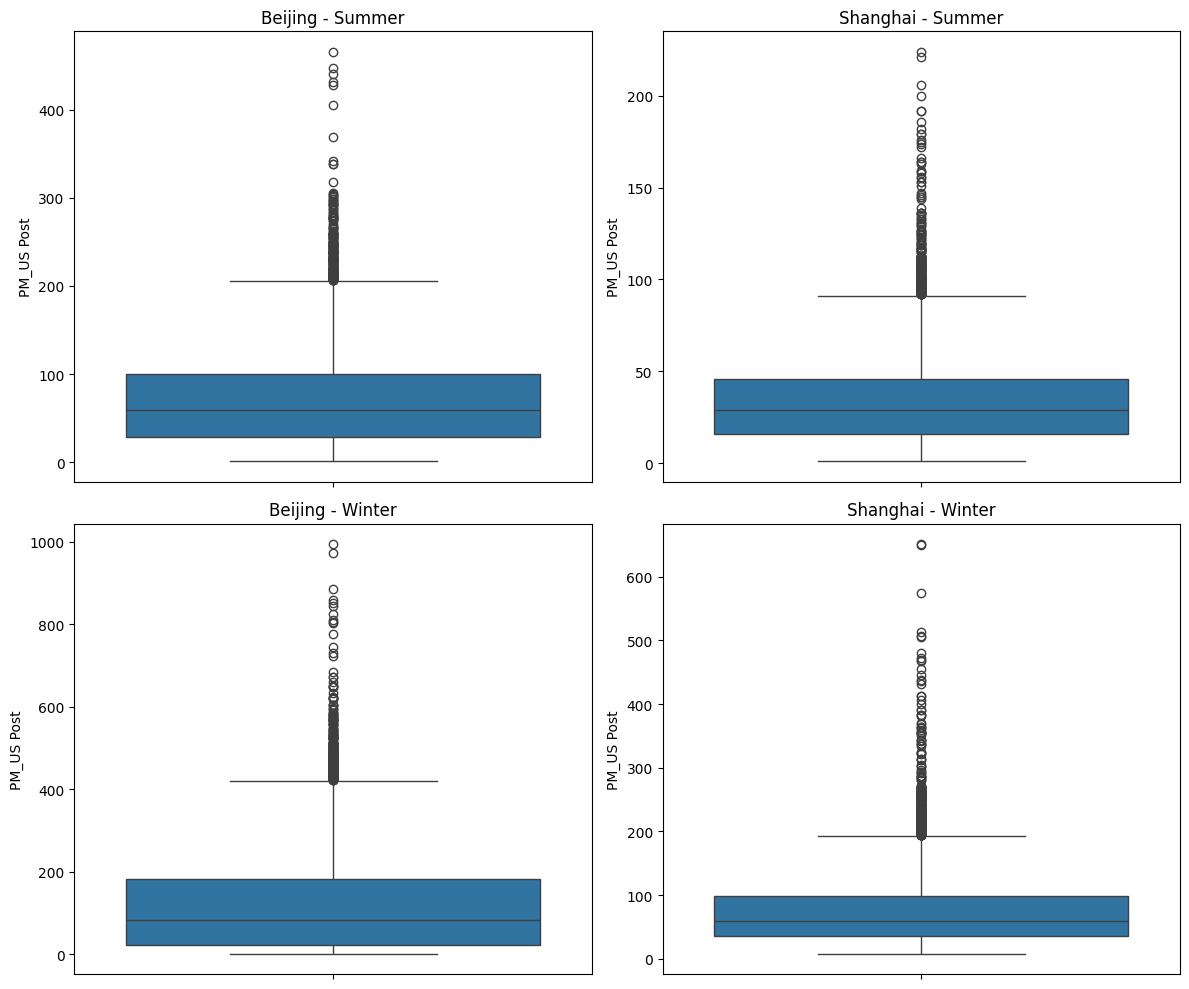

In [3]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y='PM_US Post', data=summerBeijing)
axes[0, 0].set_title('Beijing - Summer')

sns.boxplot(ax=axes[1, 0], y='PM_US Post', data=winterBeijing)
axes[1, 0].set_title('Beijing - Winter')

sns.boxplot(ax=axes[0, 1], y='PM_US Post', data=summerShanghai)
axes[0, 1].set_title('Shanghai - Summer')

sns.boxplot(ax=axes[1, 1], y='PM_US Post', data=winterShanghai)
axes[1, 1].set_title('Shanghai - Winter')

plt.tight_layout()
plt.show()


Comments here:
Recommended level of PM2.5 is at 12 µg/m³, but we can clearly see that the highest point has been close to 1000µg/m³, in Beijing during winter.

## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [4]:
# Code here
# TODO
from scipy.stats import gamma
import numpy as np


# Function to fit the gamma distribution
def fit_gamma_fonction(data):
    shape, loc, scale = gamma.fit(data, floc=0)
    return shape, scale

# Funciton to calculate the log_likelihood
def log_likelihood_fonction(data, shape, scale):
    log_likedhood = np.sum(gamma.logpdf(data, a=shape, scale=scale, loc=0))
    return log_likedhood

# Initialize lists to store PM concentration for each city and season
winter_results_Beijing = []
summer_results_Beijing = []
winter_results_Shangai = []
summer_results_Shangai = []


# Collect the winter/summer data for Beijing and Shangai

for item in winterBeijing.PM_Dongsi:
    if pd.notna(item):
        winter_results_Beijing.append(item)

for item in winterBeijing.PM_Dongsihuan:
    if pd.notna(item):
        winter_results_Beijing.append(item)

for item in winterBeijing.PM_Nongzhanguan:
    if pd.notna(item):
        winter_results_Beijing.append(item)

for item in summerBeijing.PM_Dongsi:
    if pd.notna(item):
        summer_results_Beijing.append(item)

for item in summerBeijing.PM_Dongsihuan:
    if pd.notna(item):
        summer_results_Beijing.append(item)

for item in summerBeijing.PM_Nongzhanguan:
    if pd.notna(item):
        summer_results_Beijing.append(item)

for item in summerShanghai.PM_Jingan:
    if pd.notna(item):
        summer_results_Shangai.append(item)
    
for item in summerShanghai.PM_Xuhui:
    if pd.notna(item):
        summer_results_Shangai.append(item)

for item in winterShanghai.PM_Jingan:
    if pd.notna(item):
        winter_results_Shangai.append(item)

for item in winterShanghai.PM_Xuhui:
    if pd.notna(item):
        winter_results_Shangai.append(item)


# Fit gamma parameters for summer/winter data in Beijing and Shangai
winter_shape_Beijing, winter_scale_Beijing = fit_gamma_fonction(winter_results_Beijing)
summer_shape_Beijing, summer_scale_Beijing = fit_gamma_fonction(summer_results_Beijing)
summer_shape_Shangai, summer_scale_Shangai = fit_gamma_fonction(summer_results_Shangai)
winter_shape_Shangai, winter_scale_Shangai = fit_gamma_fonction(winter_results_Shangai)

# Calculate the log_likelihood for summer/winter data for Beijing and Shangai
winter_log_likelihood_Beijing = log_likelihood_fonction(winter_results_Beijing, winter_shape_Beijing, winter_scale_Beijing)
summer_log_likelihood_Beijing = log_likelihood_fonction(summer_results_Beijing, summer_shape_Beijing, summer_scale_Beijing)
winter_log_likelihood_Shangai = log_likelihood_fonction(winter_results_Shangai, winter_shape_Shangai, winter_scale_Shangai)
summer_log_likelihood_Shangai = log_likelihood_fonction(summer_results_Shangai, summer_shape_Shangai, summer_scale_Shangai)

# Create a dataframe to store the results of the gamma parameters and log_likelihood values
results_table = pd.DataFrame({
    'City': ['Beijing', 'Beijing', 'Shanghai', 'Shanghai'],
    'Season': ['Winter', 'Summer', 'Winter', 'Summer'],
    'Shape': [winter_shape_Beijing, summer_shape_Beijing, winter_shape_Shangai, summer_shape_Shangai],
    'Scale': [winter_scale_Beijing, summer_scale_Beijing, winter_scale_Shangai, summer_scale_Shangai],
    'Log-Likelihood': [winter_log_likelihood_Beijing, summer_log_likelihood_Beijing, winter_log_likelihood_Shangai, summer_log_likelihood_Shangai]
})

# Print the results
print("Gamma distribution parameters and log-Likelihood:")
print(results_table.to_string(index=False))



Gamma distribution parameters and log-Likelihood:
    City Season    Shape      Scale  Log-Likelihood
 Beijing Winter 0.857314 133.706963   -91271.545480
 Beijing Summer 1.452944  49.720291   -95677.306921
Shanghai Winter 1.700361  49.122800   -63889.736847
Shanghai Summer 2.530515  17.558114   -56696.353832


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

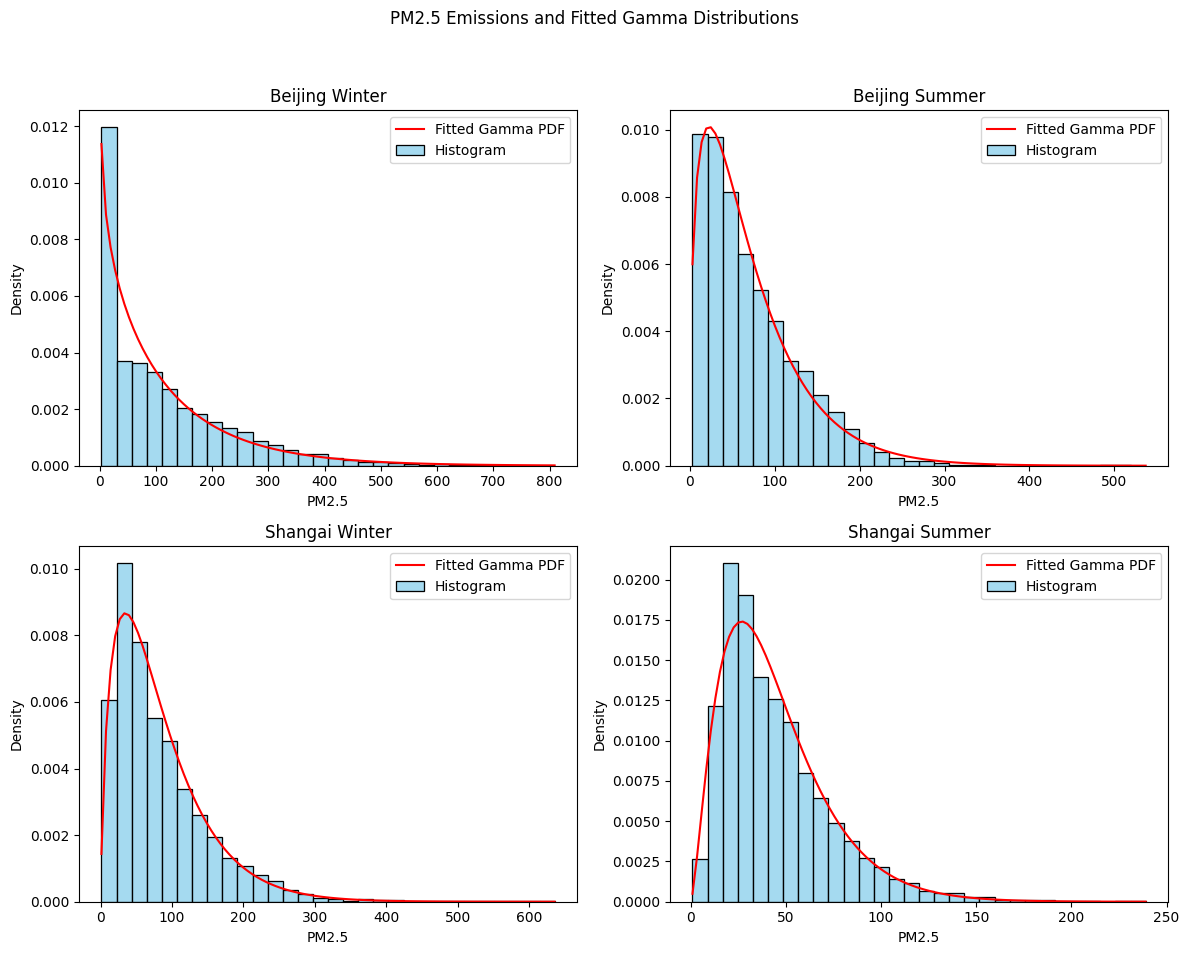

In [5]:
# Code here
# TODO 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gamma

# Funtion that plot a histogram of data 
def plot_histogram_with_gamma(data, shape, scale, title):
    sns.histplot(data, bins=30, kde=False, color='skyblue', stat='density', label='Histogram')
    x = np.linspace(min(data), max(data), 100)
    pdf_fitted = gamma.pdf(x, a=shape, scale=scale, loc=0)
    plt.plot(x, pdf_fitted, 'r-', label='Fitted Gamma PDF')
    plt.title(title)
    plt.xlabel('PM2.5')
    plt.ylabel('Density')
    plt.legend()

# Histogram data for Beijing and Shangai for winter and summer
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('PM2.5 Emissions and Fitted Gamma Distributions')

plt.subplot(2, 2, 1)
plot_histogram_with_gamma(
    winter_results_Beijing, winter_shape_Beijing, winter_scale_Beijing, 'Beijing Winter'
)

plt.subplot(2, 2, 2)
plot_histogram_with_gamma(
    summer_results_Beijing, summer_shape_Beijing, summer_scale_Beijing, 'Beijing Summer'
)

plt.subplot(2, 2, 3)
plot_histogram_with_gamma(
    winter_results_Shangai, winter_shape_Shangai, winter_scale_Shangai, 'Shangai Winter'
)

plt.subplot(2, 2, 4)
plot_histogram_with_gamma(
    summer_results_Shangai, summer_shape_Shangai, summer_scale_Shangai, 'Shangai Summer'
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [6]:
#Code here
# TODO

# Function to calculate the mean and standard deviation
# Mean formula : Mean = k (alpha) * Theta (scale)
# Standar deviation formula : Standard deviation = sqrt(k (alpha)) * Theta (scale)
def gamma_mean_standard(shape, scale):
    mean = shape * scale
    standard_deviation = scale * np.sqrt(shape)
    return mean, standard_deviation

# Calculate mean and standard deviation for Shangai and Beijing for summer and winter
Beijing_winter_mean, Beijing_winter_standard = gamma_mean_standard(winter_shape_Beijing, winter_scale_Beijing)
Beijing_summer_mean, Beijing_summer_standard = gamma_mean_standard(summer_shape_Beijing, summer_scale_Beijing)
Shangai_winter_mean, Shangai_winter_standard = gamma_mean_standard(winter_shape_Shangai, winter_scale_Shangai)
Shangai_summer_mean, Shangai_summer_standard = gamma_mean_standard(summer_shape_Shangai, summer_scale_Shangai)

# Create a table of mean and standard deviation for Shangai and Beijing for summer and winter
mean_standard_table = pd.DataFrame({
    'City' : ['Beijing', 'Beijing', 'Shangai', 'Shangai'],
    'Season' : ['Winter', 'Summer', 'Winter', 'Summer'],
    'Mean' : [Beijing_winter_mean, Beijing_summer_mean, Shangai_winter_mean,Shangai_summer_mean ],
    'Standard Deviation' : [Beijing_winter_standard,Beijing_summer_standard,Shangai_winter_standard,Shangai_summer_standard]
})

# Print the results
print("Expected PM2.5 levels and standard deviations :")
print(mean_standard_table.to_string(index=False))
print('')

# Function to calculate the 25th, 50th and 75th percentiles for a gamma distribution
def gamma_percentiles(shape,scale):
    p25 = gamma.ppf(0.25, a=shape, scale=scale, loc=0)
    p50 = gamma.ppf(0.50, a=shape, scale=scale, loc=0) 
    p75 = gamma.ppf(0.75, a=shape, scale=scale, loc=0)
    return p25,p50,p75

# Calculate the percentiles for Beijing and Shangai for winter and summer
Beijing_winter_p25, Beijing_winter_p50, Beijing_winter_p75 = gamma_percentiles(winter_shape_Beijing, winter_scale_Beijing)
Beijing_summer_p25, Beijing_summer_p50, Beijing_summer_p75 = gamma_percentiles(summer_shape_Beijing, summer_scale_Beijing)
Shangai_winter_p25, Shangai_winter_p50, Shangai_winter_p75 = gamma_percentiles(winter_shape_Shangai, winter_scale_Shangai)
Shangai_summer_p25, Shangai_summer_p50, Shangai_summer_p75 = gamma_percentiles(summer_shape_Shangai, summer_scale_Shangai)

# Create a table of percentiles
percentiles_table = pd.DataFrame({
    'City' : ['Beijing', 'Beijing', 'Shangai', 'Shangai'],
    'Season' : ['Winter', 'Summer', 'Winter', 'Summer'],
    '0.25 Percentile' : [Beijing_winter_p25,Beijing_summer_p25,Shangai_winter_p25, Shangai_summer_p25 ],
    '0.50 Percentile' : [Beijing_winter_p50, Beijing_summer_p50,Shangai_winter_p50,Shangai_summer_p50 ],
    '0.75 Percentile' : [Beijing_winter_p75,Beijing_summer_p75,Shangai_winter_p75,Shangai_summer_p75]
})

# Print the results
print("Percentiles of PM2.5 levels")
print(percentiles_table.to_string(index=False))

Expected PM2.5 levels and standard deviations :
   City Season       Mean  Standard Deviation
Beijing Winter 114.628808          123.800928
Beijing Summer  72.240782           59.931900
Shangai Winter  83.526475           64.055088
Shangai Summer  44.431065           27.930731

Percentiles of PM2.5 levels
   City Season  0.25 Percentile  0.50 Percentile  0.75 Percentile
Beijing Winter        27.827534        74.324815       158.747145
Beijing Summer        28.557758        56.509862        99.083606
Shangai Winter        36.612071        67.844443       113.608036
Shangai Summer        23.892236        38.735340        58.823899


Comments here:

Mean formula : Mean = k (alpha) * Theta (scale)
Standar deviation formula : Standard deviation = sqrt(k (alpha)) * Theta (scale)

- If the fitted Gamma distribution mean and standard deviation are close to the empirical values, it means a good fit

- The qualitity of fit can be interpreted by comparing both fitted and empirical results accros mean, standard deviation and percentiles

- The differences between fitted and empirical percentiles could be caused by the fact that the Gamma distribution does not perfectly capture the data distribution's characteristics






------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

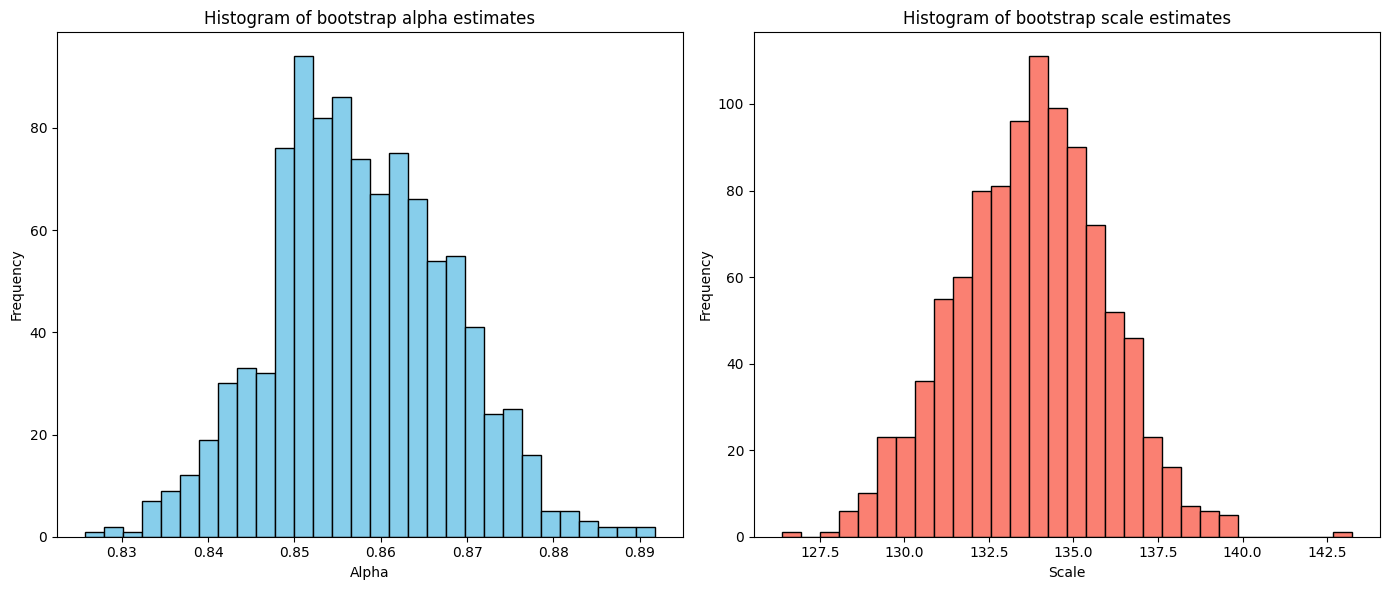

5% Confidence interval for alpha : 
2.5: 0.8379118791348844
97.5: 0.8775125791117653
5% Confidence interval for scale :
2.5: 129.41620082802305
97.5: 137.9078901367306


In [7]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt


# Defining the number of bootstrap samples and size
bootstap_samples = 1000
sample_size = 6000

# Initialize lists to store bootstrap estimates (shape) and scale parameters
bootstrap_alpha = []
bootstrap_scale = []

# Bootstrap procedure that repeats 1000 times
for _ in range(bootstap_samples):
    
    # A random sample with replacement from winter PM2.5 data in Beijing
    bootstap_samples = np.random.choice(winter_results_Beijing, sample_size, replace=True)
    
    # Fit a gamma distribution to the bootstrap sample
    alpha, loc, scale = gamma.fit(bootstap_samples, floc=0)

    # Append the estimated alpha and scale parameters
    bootstrap_alpha.append(alpha)
    bootstrap_scale.append(scale)


# Plot histogram
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(bootstrap_alpha, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of bootstrap alpha estimates')
plt.xlabel('Alpha')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(bootstrap_scale, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of bootstrap scale estimates')
plt.xlabel('Scale')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate the 5% confidence intervals for alpha and scale parameters
alpha_interval_025 = np.percentile(bootstrap_alpha, 2.5)
alpha_interval_975 = np.percentile(bootstrap_alpha, 97.5)
scale_interval_025 = np.percentile(bootstrap_scale, 2.5)
scale_interval_975 = np.percentile(bootstrap_scale, 97.5)

# Print results
print("5% Confidence interval for alpha : ")
print(f"2.5: {alpha_interval_025}")
print(f"97.5: {alpha_interval_975}")
print("5% Confidence interval for scale :")
print(f"2.5: {scale_interval_025}")
print(f"97.5: {scale_interval_975}")


Comments here:

- The intervals provide insight into the uncertainty around the MLE estimates, indicating the range in which the true parameter values likely fall

- If the histograms show a narrow spread and the confidence intervals are tight, the MLE estimates are considered accurate. The other way around indicates less precision.

## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [8]:
import statsmodels.api as sm
import pandas as pd 

winterData = winterBeijing.dropna()

# dummies

winterDataDummies = pd.get_dummies(winterData, columns=['cbwd'], drop_first=True)

# regression

x = winterDataDummies[['DEWP', 'TEMP', 'HUMI', 'PRES', 'Iws', 'precipitation']]
y = winterDataDummies['PM_US Post']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'

Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

data = dataBeijing['PM_US Post']
data = data.reset_index()  
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data[['date', 'PM_US Post']]
print(data.dtypes)

# split data
split_index = int(0.75 * len(data))
train_data = data['PM_US Post'].iloc[:split_index]
val_data = data.iloc[split_index:]

model = AutoReg(train_data, lags=3)
model_fit = model.fit()

print("Model Coefficients:", model_fit.params)
print("Model Summary:")
print(model_fit.summary())


date          datetime64[ns]
PM_US Post           float64
dtype: object
Model Coefficients: const            3.782153
PM_US Post.L1    1.158556
PM_US Post.L2   -0.214590
PM_US Post.L3    0.016921
dtype: float64
Model Summary:
                            AutoReg Model Results                             
Dep. Variable:             PM_US Post   No. Observations:                25697
Model:                     AutoReg(3)   Log Likelihood             -116988.431
Method:               Conditional MLE   S.D. of innovations             22.970
Date:                Thu, 31 Oct 2024   AIC                         233986.862
Time:                        17:24:29   BIC                         234027.633
Sample:                             3   HQIC                        234000.041
                                25697                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

                     PM_US Post
date                           
2015-01-03 17:00:00       214.0
2015-01-03 18:00:00       241.0
2015-01-03 19:00:00       262.0
2015-01-03 20:00:00       264.0
2015-01-03 21:00:00       305.0
...                         ...
2015-12-31 19:00:00       133.0
2015-12-31 20:00:00       169.0
2015-12-31 21:00:00       203.0
2015-12-31 22:00:00       212.0
2015-12-31 23:00:00       235.0

[8566 rows x 1 columns]
Indices of Train Forecast:
3        219.971970
4         58.258516
5         33.323686
6         23.712843
7         21.502163
            ...    
25693    169.318934
25694    180.832664
25695    166.875074
25696    176.175373
25697    192.096963
Length: 25695, dtype: float64
test datas : 25697    192.096963
25698    187.933418
25699    183.557321
25700    179.365541
25701    175.377742
            ...    
34258     96.699574
34259     96.699574
34260     96.699574
34261     96.699574
34262     96.699574
Length: 8566, dtype: float64


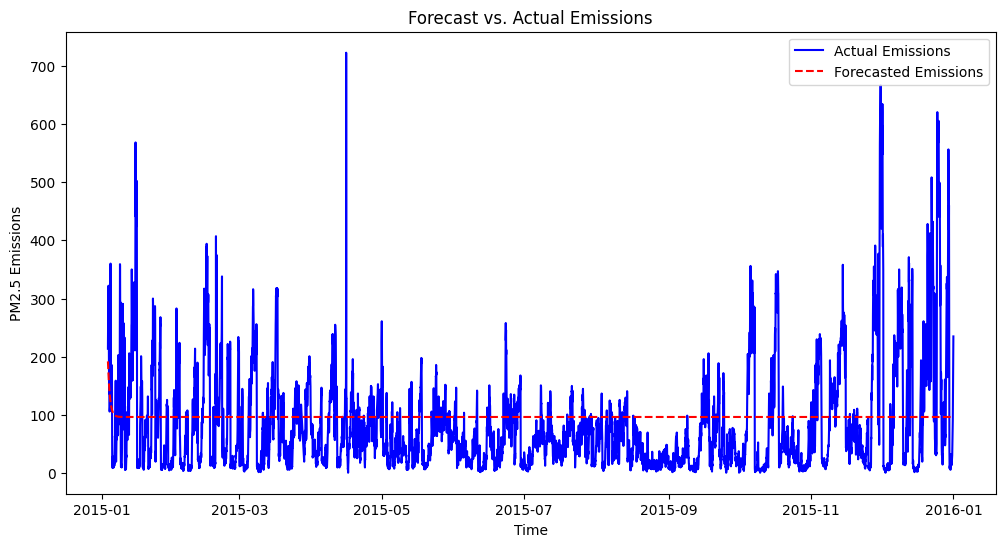

ERROR
25697     21.903037
25698     53.066582
25699     78.442679
25700     84.634459
25701    129.622258
            ...    
34258     36.300426
34259     72.300426
34260    106.300426
34261    115.300426
34262    138.300426
Length: 8566, dtype: float64


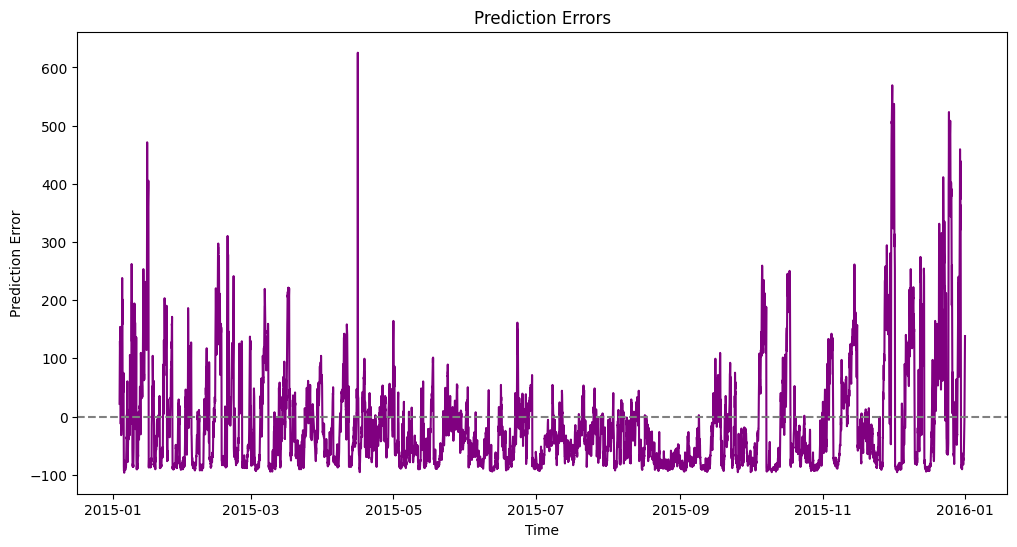

Mean Absolute Error (Training Set): 3.630
Mean Absolute Error (Test Set): 96.932


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# Création d'un nouvel index de date
validation_data = val_data


# Compute MAE for training and test sets
train_forecast = model_fit.predict(start=3, end=len(train_data))


# Use model to forecast on the test set



test_forecast = model_fit.predict(start=len(train_data), end=len(data)-1, dynamic=False)




# Plot forecast vs. real emissions
plt.figure(figsize=(12, 6))
plt.plot(validation_data.index, validation_data, label='Actual Emissions', color='blue')
plt.plot(validation_data.index, test_forecast, label='Forecasted Emissions', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PM2.5 Emissions')
plt.title('Forecast vs. Actual Emissions')
plt.legend()
plt.show()

# Plot prediction errors

temp = test_forecast
k = len(train_data)
for index, row in validation_data.iterrows():

    temp[k] = row['PM_US Post'] - temp[k]
    k += 1



plt.figure(figsize=(12, 6))
plt.plot(validation_data.index, temp, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.show()



# deleting the NaN 
train_forecast = train_forecast.dropna()
train_data_aligned = train_data.iloc[len(train_data) - len(train_forecast):] 

# Computing MAE

mae_train = mean_absolute_error(train_data_aligned, train_forecast)
validation_data_aligned = validation_data.dropna()
test_forecast_aligned = test_forecast.dropna() 
mae_test = mean_absolute_error(validation_data_aligned, test_forecast_aligned)

print(f"Mean Absolute Error (Training Set): {mae_train:.3f}")
print(f"Mean Absolute Error (Test Set): {mae_test:.3f}")



Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

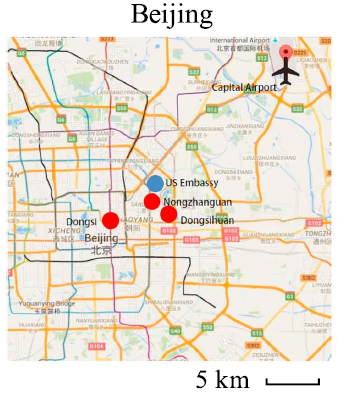


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [ ]:
# Code here
dataBeijing2 = pd.read_csv("BeijingPM.csv")
dataBeijing2 = dataBeijing2[(dataBeijing2['year'] >= 2012) & (dataBeijing2['year'] <= 2015)]
winterBeijing2 = dataBeijing2[dataBeijing2['season'] == 4]

dataBeijing2_NaN = winterBeijing2.dropna(subset=['PM_US Post', 'PM_Nongzhanguan'])

b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [ ]:
# Code here
from scipy import stats

PM_Nongzhangan = dataBeijing2_NaN["PM_Nongzhanguan"]
PM_Us = dataBeijing2_NaN["PM_US Post"]

t_stat, p_value = stats.ttest_rel(PM_Us, PM_Nongzhangan)

print(f"PM_Nongzhangan variance = {np.var(PM_Nongzhangan)}")
print(f"PM_Us variance = {np.var(PM_Us)}")
print("")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

PM_Nongzhangan variance = 13694.396018270234
PM_Us variance = 15189.637054170165

T-statistic: 21.21769799130861
P-value: 2.694804396978746e-96


Comment here:

Performing the student test on two related samples of values, the hourly PM2.5 emission values at Nongzhanguan and the US Embassy gives a t-value of 21.28 and a p-value of 2.69e-96. 

We perform a student test with values that are related because they were taken at the same date and time.

We can observe that p is well below 0.05, so we can reject the null hypothesis and conclude that the average PM2.5 emissions at Nongzhanguan and the US Embassy are statistically different.

All the assumptions required to perform this test is not satisfied. The assumption that the variance of the values in the two groups must be similar is false. It can be seen that the two variance values are quite different. This is why, when we run the test, we add an argument to specify that the variances are not equal. Another assumption that is not respected is that the values must respect a normal distribution, which is false in our case.

c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

The Wilcoxon-Test tests whether there is a difference between two dependent samples. It checks if there is a difference in the rank total. 

The main advantage of this test compared to the Student's T test is that the datas do not have to be normally distributed. 

This test is useful for our project, because when we look at the values for Beijing in Nongzhanguan and at the embassy, these do not correspond to a normal distribution. So the use of this test corresponds well to our project.

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [ ]:
# Code here
w_stat, p_w_value = stats.wilcoxon(PM_Nongzhangan, PM_Us)

print(f"T-statistic: {w_stat}")
print(f"P-value: {p_w_value}")

T-statistic: 4283393.0
P-value: 2.7876634046482492e-186


Comment here:

We can conclude that since the p-value is smaller than 0.05, we can reject the null hypothesis and say that there is a significant difference between PM2.5 emissions at Nongzhanguan and at the embassy.